In [1]:
import pandas as pd
import numpy as np
import time
from src.peblMl import *
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix as CM2
from sklearn.metrics import classification_report

In [2]:
%%time
data_start=pd.read_pickle('data/wikiNews.pkl')
data_train=data_start[:3000]
data_test=data_start[3000:]
#data_test=data_test[data_test['topic'].isin(['политика', 'россия', 'европа', 'футбол', 'спорт', 'астрономия', 'other'])]
data_test=data_test[data_test['topic'].isin(['политика', 'россия', 'other'])]
#data_train=data_train[~data_train['topic'].isin(['other'])]
#data_train=data_train[data_train['topic'].isin(['политика', 'россия', 'европа', 'футбол', 'спорт', 'астрономия'])]
data_train=data_train[data_train['topic'].isin(['политика', 'россия'])]
print (len(data_test), len(data_train))
print ('Train Data: \n', data_train['topic'].value_counts())
print ('Test Data: \n', data_test['topic'].value_counts())

7510 595
Train Data: 
 политика    376
россия      219
Name: topic, dtype: int64
Test Data: 
 other       7353
политика      79
россия        78
Name: topic, dtype: int64
Wall time: 619 ms


In [3]:
d_t=data_test[~data_test['topic'].isin(['other'])]
print (len(d_t), len(data_train))

157 595


In [4]:
data_train.head()

,Noun,Text,category,topic,date_news
1520,ангел меркель германия германия женщина правит...,ангела меркель канцлер германии германия она п...,ангела_меркель христианско_демократический_сою...,политика,2005-11-01
1531,ограничение технология доставка мкс состояние ...,ограничения закупку космических технологий кос...,космонавтика мкс политика_сша джордж_уокер_буш...,политика,2005-11-01
1588,штайнмайер время встреча министр wсша wкондоли...,визит штайнмайера сша сшаво время встречи новы...,германия сша политика кондолиза_райс цру,политика,2005-11-01
1676,телеканал суббота wтелеканал телеканал мир цел...,вещание телеканал today культурав субботу веща...,россия культура телевидение маргарита_симоньян...,россия,2005-11-01
1499,правительство германия берлин ноябрь кандидат ...,канцлер новое правительство германии берлин но...,политика христианско_демократический_союз_герм...,политика,2005-11-01


In [5]:
%%time
modelML=peblMl()
modelML.fit(data_train['Noun'].tolist(), data_train['topic'].tolist())

Wall time: 124 ms


In [6]:
ar_avg_prob=modelML.ProbTopicWord


In [7]:
print (len(np.amax(ar_avg_prob, axis=1)), len(np.amax(ar_avg_prob, axis=0)))

2 6823


In [8]:
print (np.amax(ar_avg_prob, axis=1), np.average(np.amax(ar_avg_prob, axis=1)), np.median(np.amax(ar_avg_prob, axis=1)))

[0.99969706 0.99978728] 0.9997421703993963 0.9997421703993963


In [9]:
modelML.predict(data_train['Noun'].tolist()[11], 'newTopic')[:10]

политика    0.85962
россия      0.14038
newTopic    0.00000
dtype: float64

In [10]:
%%time
topicValueResult=pd.DataFrame(columns=['topicName', 'probValue', 'realTopic'])
goodT=0
wrongT=0
i=0
for testRow in data_test['Noun'].tolist():
    result=modelML.predict(testRow, 'other')[:1]
    topicValueResult=topicValueResult.append({'topicName': result.index[0], 'probValue': result.values[0], 
                                             'realTopic': data_test['topic'][i]}, ignore_index=True)
    if result.index[0]!='other' and data_test['topic'][i]!='other':
        #print (result.index[0], result.values[0], data_test['topic'][i])
        goodT+=1
    if data_test['topic'][i]!='other' and result.index[0]=='other':
        wrongT+=1
    i+=1
    #if i%10==0:
    #    print (result.index[0], result.values[0])


Wall time: 1min


In [11]:
print (wrongT, goodT)

17 140


In [12]:
topicValueResult.head() 

,topicName,probValue,realTopic
0,other,0.429024,other
1,политика,0.488366,other
2,other,0.579363,other
3,политика,0.594189,other
4,other,0.491023,other


In [13]:
topicValueResult['topicName'].value_counts()

политика    4605
other       2425
россия       480
Name: topicName, dtype: int64

In [14]:
topicValueResult['realTopic'].value_counts()

other       7353
политика      79
россия        78
Name: realTopic, dtype: int64

In [15]:
topicValueResult.groupby(['topicName']).sum()

,probValue
topicName,
other,1201.341028
политика,2313.734750
россия,202.219094


Topic 
 OrderedDict([('cm', Predicted  other  политика  россия  __all__
Actual                                     
other       2408      4483     462     7353
политика       0        78       1       79
россия        17        44      17       78
__all__     2425      4605     480     7510), ('overall', OrderedDict([('Accuracy', 0.33328894806924103), ('95% CI', (0.3226275340847298, 0.3440798974367023)), ('No Information Rate', 'ToDo'), ('P-Value [Acc > NIR]', 0.9999999999999999), ('Kappa', 0.014810112387811313), ("Mcnemar's Test P-Value", 'ToDo')])), ('class', Classes                                     other     политика     россия
Population                                   7510         7510       7510
P: Condition positive                        7353           79         78
N: Condition negative                         157         7431       7432
Test outcome positive                        2425         4605        480
Test outcome negative                        5085         2905

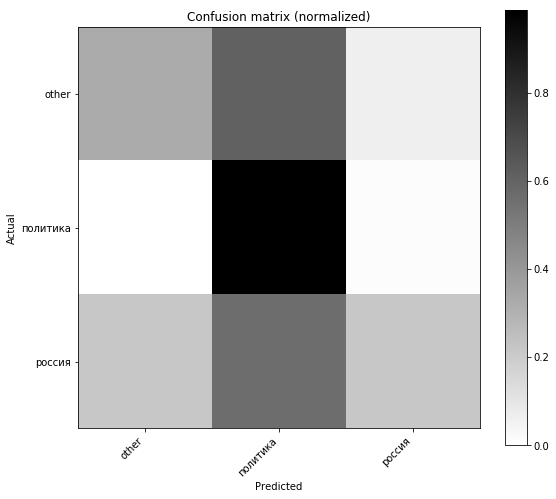

             precision    recall  f1-score   support

   политика       0.02      0.99      0.03        79
     россия       0.04      0.22      0.06        78
      other       0.99      0.33      0.49      7353

avg / total       0.97      0.33      0.48      7510



In [17]:
print ('Topic \n', CM2(topicValueResult['realTopic'], topicValueResult['topicName']).stats())
CM2(topicValueResult['realTopic'], topicValueResult['topicName']).plot(normalized=True)
plt.show()
print(classification_report(topicValueResult['realTopic'], topicValueResult['topicName'], labels=['политика', 'россия', 'other']))
